In [277]:
import os 
if 'notebooks' in os.getcwd():
    os.chdir("..")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from typing import Dict, List, Tuple

In [278]:
data = pd.read_csv(
    "data/round5/trades_round_4_day_2_wn.csv",
    sep = ';'
).set_index("timestamp")

In [279]:
prices = pd.read_csv(
    "data/round4/prices_round_4_day_2.csv",
    sep = ';'
).set_index("timestamp")

In [280]:
data.currency.value_counts()

SEASHELLS    10668
Name: currency, dtype: int64

# Biggest buyers and sellers

In [281]:
prices

,day,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss
timestamp,,,,,,,,,,,,,,,,
0,2,PEARLS,9998.0,3.0,9996.0,1.0,9995.0,21.0,10004.0,1.0,10005.0,21.0,NaN,NaN,10001.0,0.0
0,2,BANANAS,4822.0,3.0,4821.0,22.0,NaN,NaN,4827.0,22.0,NaN,NaN,NaN,NaN,4824.5,0.0
0,2,DIVING_GEAR,99191.0,20.0,NaN,NaN,NaN,NaN,99194.0,20.0,NaN,NaN,NaN,NaN,99192.5,0.0
0,2,COCONUTS,7923.0,214.0,NaN,NaN,NaN,NaN,7925.0,64.0,7926.0,150.0,NaN,NaN,7924.0,0.0
0,2,DIP,7094.0,59.0,7093.0,196.0,NaN,NaN,7095.0,59.0,7096.0,196.0,NaN,NaN,7094.5,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999900,2,PICNIC_BASKET,74008.0,1.0,74007.0,19.0,74006.0,20.0,74019.0,1.0,74020.0,19.0,74021.0,20.0,74013.5,211296.0
999900,2,DOLPHIN_SIGHTINGS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3094.0,0.0
999900,2,PINA_COLADAS,14847.0,102.0,NaN,NaN,NaN,NaN,14850.0,102.0,NaN,NaN,NaN,NaN,14848.5,32480.0


In [282]:
prices_dict : Dict[str, pd.Series] = dict()
for product in prices['product'].unique():
    prices_dict[product] = prices.query(f"product == '{product}'")\
        .mid_price

In [283]:
player_buys : Dict[str, pd.Series] = dict()
player_sells : Dict[str, pd.Series] = dict()
for player in data['buyer'].unique():
    player_buys[player] = data.query(f"buyer == '{player}'")\
        [['price', 'symbol', 'quantity']]
    player_sells[player] = data.query(f"seller == '{player}'")\
        [['price', 'symbol', 'quantity']]

In [284]:
player_sells

{'Gary':             price   symbol  quantity
 timestamp                           
 1600       9996.0   PEARLS         1
 1900       9998.0   PEARLS         8
 1900       9998.0   PEARLS         4
 6500       3847.0  BERRIES        13
 8100       3845.0  BERRIES        11
 ...           ...      ...       ...
 978400     4789.0  BANANAS        18
 986200     3910.0  BERRIES        17
 993300     4796.0  BANANAS         9
 993300     4796.0  BANANAS         3
 999200     4792.0  BANANAS        18
 
 [244 rows x 3 columns],
 'Charlie':              price       symbol  quantity
 timestamp                                
 200         4827.0      BANANAS         1
 500        10005.0       PEARLS         2
 500         4828.0      BANANAS         2
 1000       10002.0       PEARLS         2
 2400       99170.0  DIVING_GEAR         1
 ...            ...          ...       ...
 997600      4797.0      BANANAS         5
 998100     10005.0       PEARLS         5
 998400     10002.0       PEAR

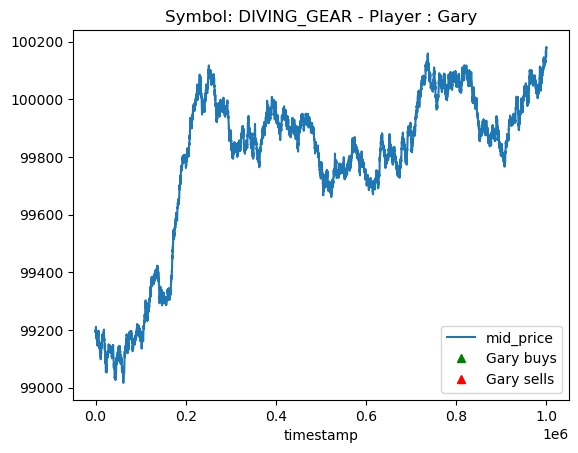

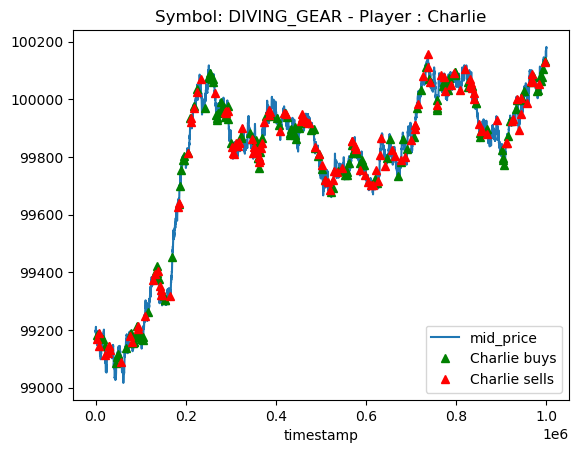

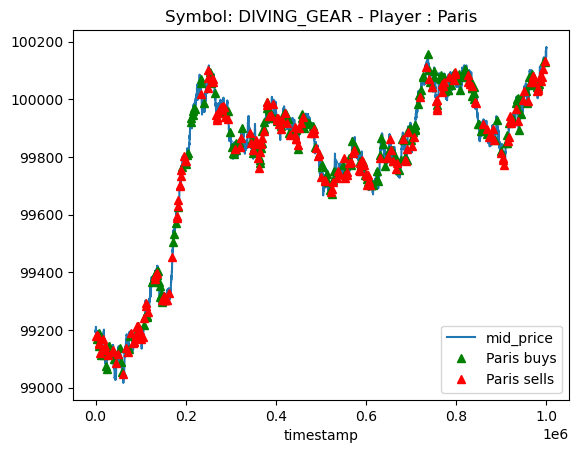

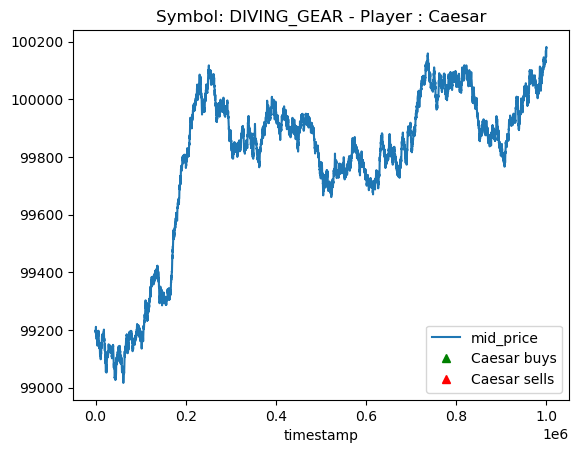

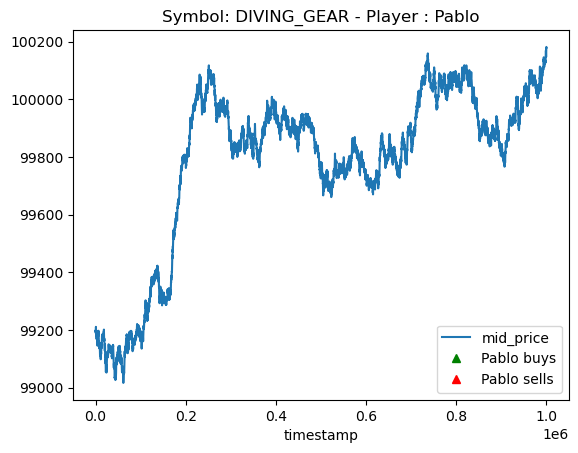

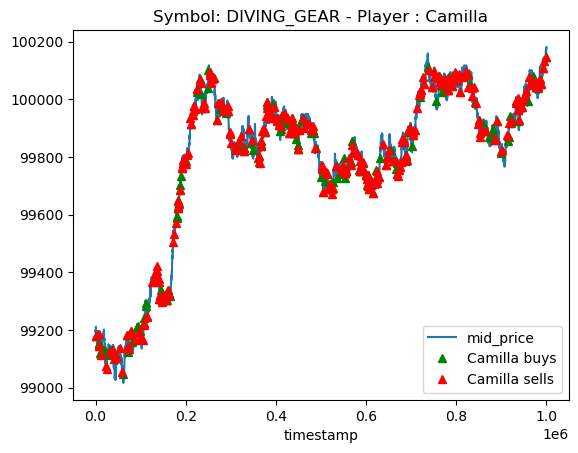

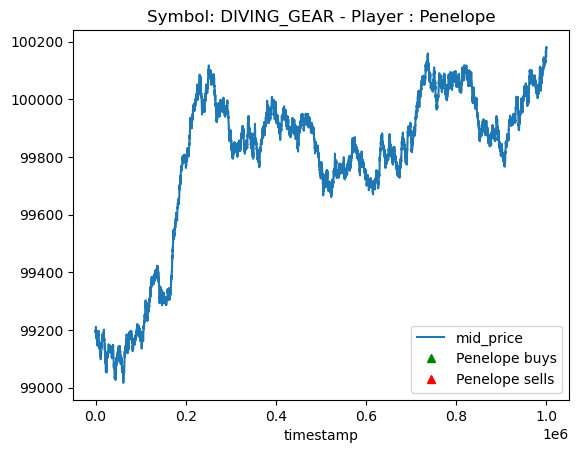

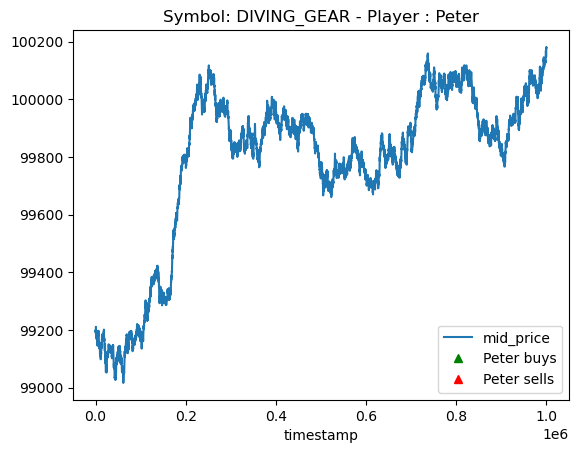

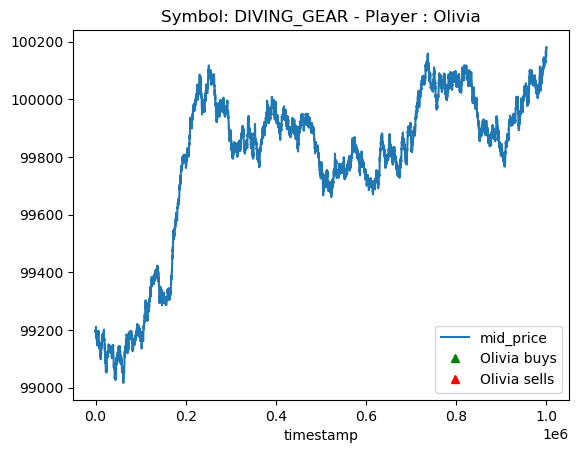

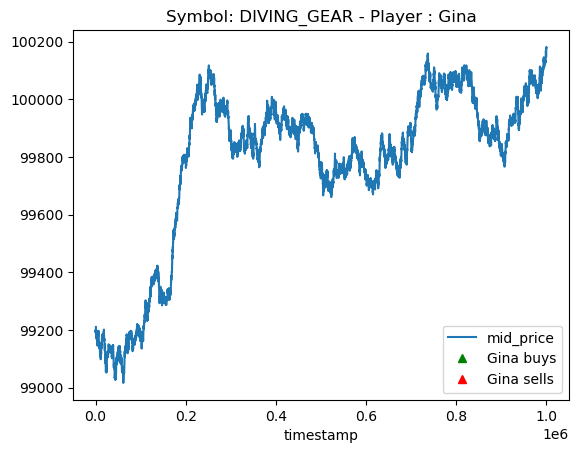

In [285]:
for symbol in prices_dict.keys():
    if symbol == "DOLPHIN_SIGHTINGS":
        continue
    if not symbol in ["DIVING_GEAR"]:
        continue
    for player in player_buys.keys():
        # if not player in ["Charlie"]:
            # continue
        plt.subplot()
        prices_dict[symbol]\
            .plot()

        player_buys[player].query(f"symbol == '{symbol}'")\
            .price\
            .plot(
                marker ='^', 
                color ='green', 
                linestyle= 'None',
                label = f'{player} buys'
            )
        
        player_sells[player].query(f"symbol == '{symbol}'")\
            .price\
            .plot(
                marker = '^',
                color = 'red',
                linestyle = 'None',
                label = f'{player} sells'
            )
        
        plt.title(f"Symbol: {symbol} - Player : {player}")
        plt.legend()
        plt.show()
    # if n%3 ==0:
    #     plt.show()

In [286]:
250*(-prices_dict["BERRIES"].loc[2e5] + 2*prices_dict["BERRIES"].loc[5e5] - prices_dict["BERRIES"].iloc[-1])

27750.0

In [287]:
frequency = player_buys["Charlie"]\
    .query("symbol == 'COCONUTS'")\
    .index

In [288]:
pd.Series(frequency)\
    .diff(1)\
    .describe()

count      104.000000
mean      9566.346154
std       8428.841040
min        100.000000
25%       3375.000000
50%       7300.000000
75%      13250.000000
max      36200.000000
Name: timestamp, dtype: float64

In [289]:
pnl : Dict[Tuple[str], pd.Series] = dict()
for player in player_buys.keys():
    pnl[player] = 0

for symbol in prices_dict.keys():
    if symbol == "DOLPHIN_SIGHTINGS":
        continue
    if not symbol in ["UKULELE", "BAGUETTE", "DIP", "PICNIC_BASKET"]:
        continue
    for player in player_buys.keys():

        # plt.figure()
    
        buys = player_buys[player].query(f"symbol == '{symbol}'")\
            .price 
        sells = player_sells[player].query(f"symbol == '{symbol}'")\
            .price
        
        long_pos = player_buys[player].query(f"symbol == '{symbol}'")\
            .quantity
        short_pos = player_sells[player].query(f"symbol == '{symbol}'")\
            .quantity
        
        cash = pd.concat([sells * short_pos, -buys * long_pos])\
            .sort_index()\
            .cumsum()
        
        cash = cash[~cash.index.duplicated(keep='last')]\
            .reindex(prices_dict["BANANAS"].index)\
            .fillna(method = 'ffill')\
            .fillna(0)
        
        position = pd.concat([long_pos, -short_pos])\
            .sort_index()\
            .cumsum()
            
        position = position[~position.index.duplicated(keep='last')]\
            .reindex(prices_dict["BANANAS"].index)\
            .fillna(method= 'ffill')\
            .fillna(0)
        
        value_on_position = position * prices_dict[symbol]

        pnl[player] += cash + value_on_position

In [290]:
long_pos

Series([], Name: quantity, dtype: int64)

In [291]:
short_pos

Series([], Name: quantity, dtype: int64)

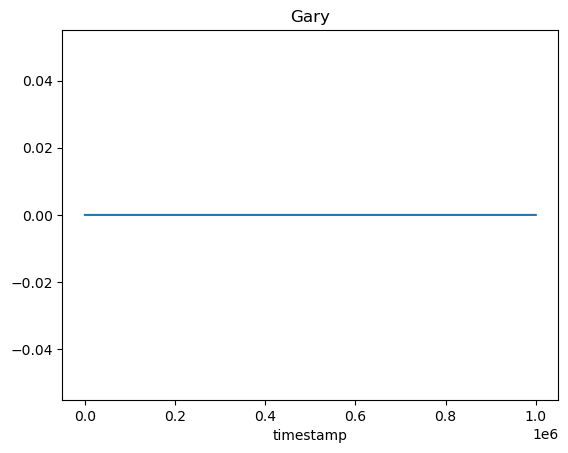

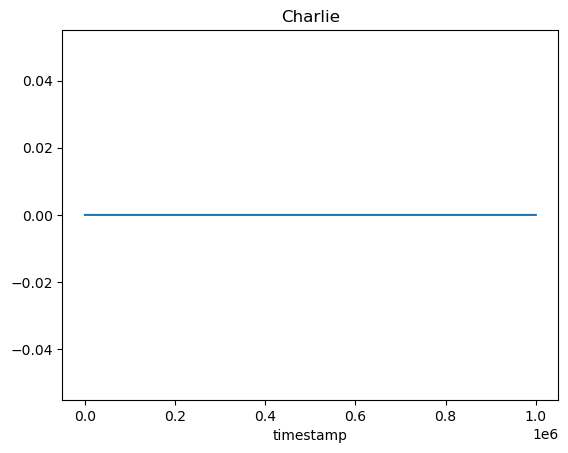

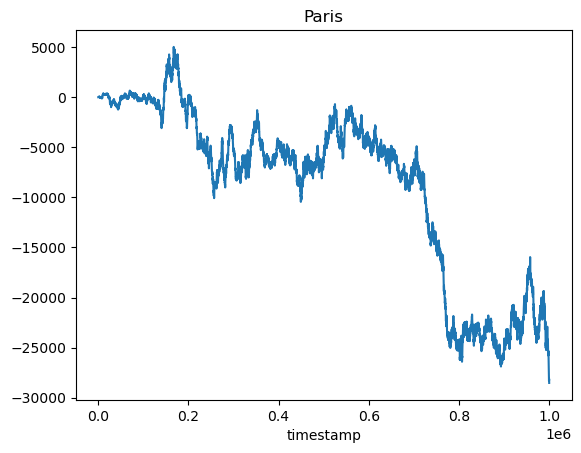

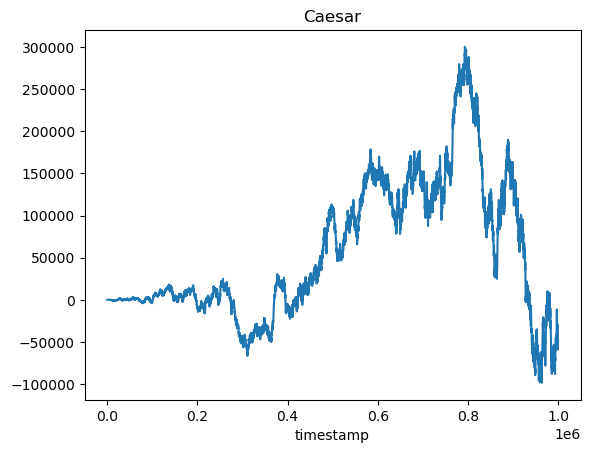

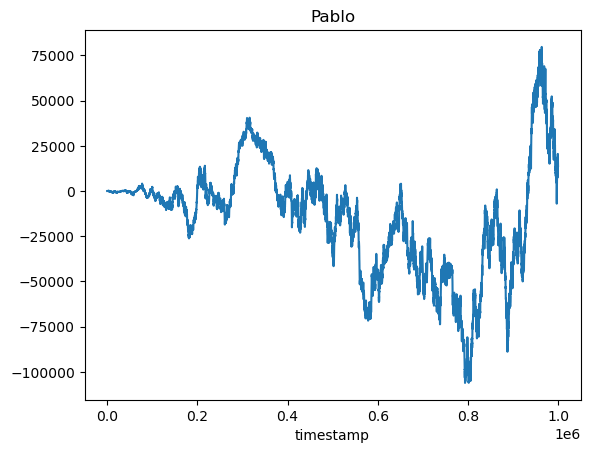

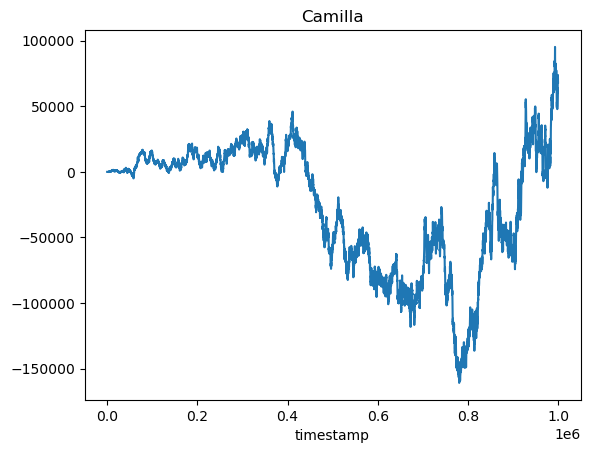

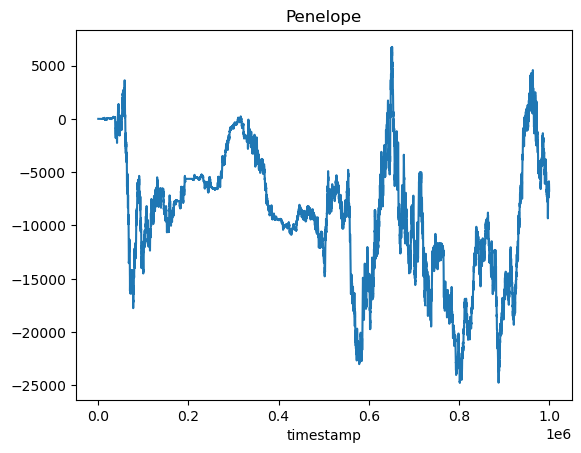

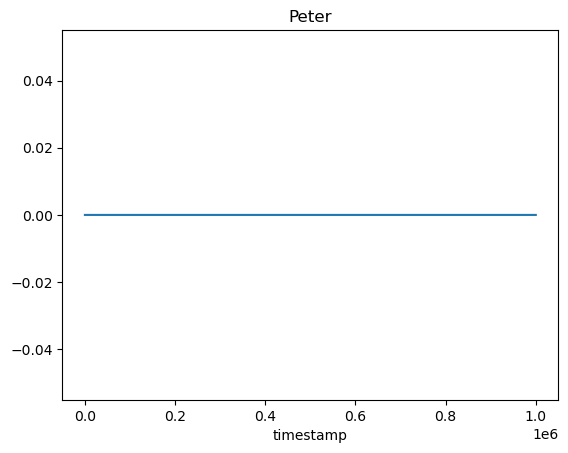

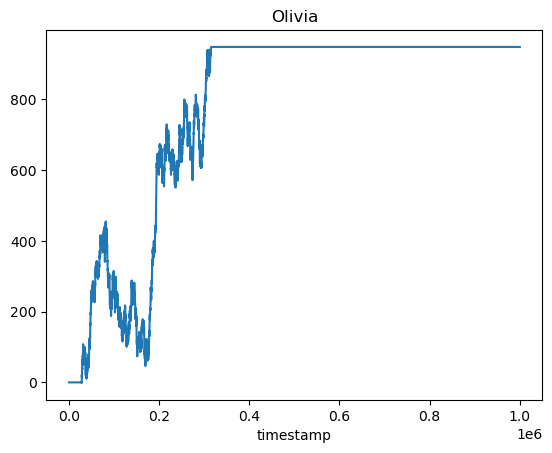

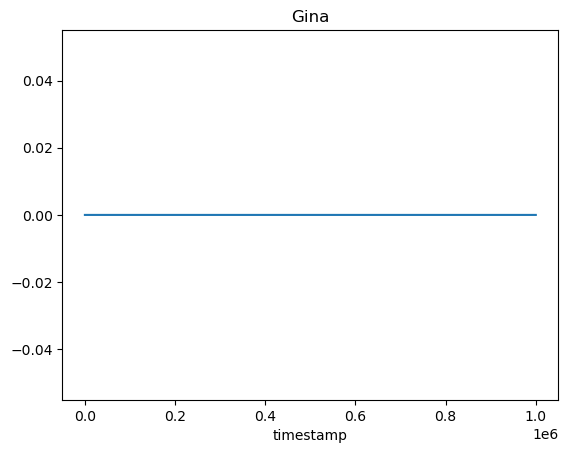

In [292]:
for res in pnl.keys():
    plt.figure()
    pnl[res].plot(
        title = res
    )
    

In [293]:
# pnl[("COCONUTS", "Charlie")]\
#     .plot()

# Analysing best traders in each product

In [294]:
pnl_per_product = pd.DataFrame(pnl)

In [295]:
final_pnl_df = pnl_per_product.iloc[-1]\
    .rename_axis(["symbol", "player"])\
    .rename("final_pnl")\
    .reset_index()

ValueError: Length of new names must be 1, got 2

In [ ]:
final_pnl_df

,symbol,player,final_pnl
0,PINA_COLADAS,Paris,0.0
1,PINA_COLADAS,Charlie,-9184.5
2,PINA_COLADAS,Caesar,-7796.5
3,PINA_COLADAS,Penelope,0.0
4,PINA_COLADAS,Camilla,0.0
...,...,...,...
95,UKULELE,Pablo,0.0
96,UKULELE,Gina,0.0
97,UKULELE,Gary,0.0
98,UKULELE,Peter,0.0


In [ ]:
final_pnl_df.query("symbol == 'DIVING_GEAR'")

,symbol,player,final_pnl
50,DIVING_GEAR,Paris,7867.0
51,DIVING_GEAR,Charlie,-7121.0
52,DIVING_GEAR,Caesar,0.0
53,DIVING_GEAR,Penelope,0.0
54,DIVING_GEAR,Camilla,-746.0
55,DIVING_GEAR,Pablo,0.0
56,DIVING_GEAR,Gina,0.0
57,DIVING_GEAR,Gary,0.0
58,DIVING_GEAR,Peter,0.0
59,DIVING_GEAR,Olivia,0.0
